In [10]:
#importing necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [8]:
#Loading Datasets
covid_df = pd.read_csv(r"C:\Users\yogan\Downloads\covid_19_clean_complete.csv",parse_dates=['Date'])
covid_df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### Exploratory Data Analysis

In [3]:
#Checking for Null
covid_df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [5]:
#Checking for duplicates
covid_df.duplicated().sum()

0

In [9]:
#Checking for correct data type
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [14]:
#Renaming the columns for better understanding and accessibility
covid_df.rename(columns={'Date':'date','Province/State':'state','Country/Region':'country','Lat':'lat','Long':'long','Confirmed':'confirmed','Deaths':'deaths','Recovered':'recovered','Active':'active','WHO Region':'who_Region'},inplace=True)
covid_df

,state,country,lat,long,date,confirmed,deaths,recovered,active,who_Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### Visualizations Using Plotly

In [19]:
#Preparing data by grouping on the basis of Country and each date
world_df=covid_df.groupby(['country','date'])[['confirmed','deaths','recovered','active']].sum().reset_index()


world_df = world_df[world_df['date']=='2020-07-27']

In [25]:
#Visualizing world map with Confirmed cases data on 2020-07-27

figure = px.choropleth(world_df,locations='country'
                       ,locationmode='country names'
                       ,hover_name='country'
                       ,color = 'confirmed'
                       ,range_color=[1,10000]
                       ,color_continuous_scale='reds'
                       ,title='Countries with confirmed cases')
figure.show()

In [26]:
#Visualizing world map with Active case data on 2020-07-27

figure = px.choropleth(world_df,locations='country'
                       ,locationmode='country names'
                       ,hover_name='country'
                       ,color = 'active'
                       ,range_color=[1,10000]
                       ,color_continuous_scale='greens'
                       ,title='Countries with Active cases')
figure.show()

In [27]:
#Visualizing world map with Deaths case data on 2020-07-27

figure = px.choropleth(world_df,locations='country'
                       ,locationmode='country names'
                       ,hover_name='country'
                       ,color = 'deaths'
                       ,range_color=[1,10000]
                       ,color_continuous_scale='greys'
                       ,title='Countries with death cases')
figure.show()

In [23]:
#Visualizing world map with Recovered cases data on 2020-07-27

figure = px.choropleth(world_df,locations='country'
                       ,locationmode='country names'
                       ,hover_name='country'
                       ,color = 'recovered'
                       ,range_color=[1,10000]
                       ,color_continuous_scale='blues'
                       ,title='Countries with recovered cases')
figure.show()

### Visualizing line plot for India with active cases along with datetime

In [35]:
active_cases = covid_df.groupby(['country','date']).sum().reset_index()[['country','date','active']]
active_cases_India = active_cases[active_cases['country'] == 'India']
active_cases_India

,country,date,active
14852,India,2020-01-22,0
14853,India,2020-01-23,0
14854,India,2020-01-24,0
14855,India,2020-01-25,0
14856,India,2020-01-26,0
...,...,...,...
15035,India,2020-07-23,440298
15036,India,2020-07-24,456234
15037,India,2020-07-25,468002
15038,India,2020-07-26,485277


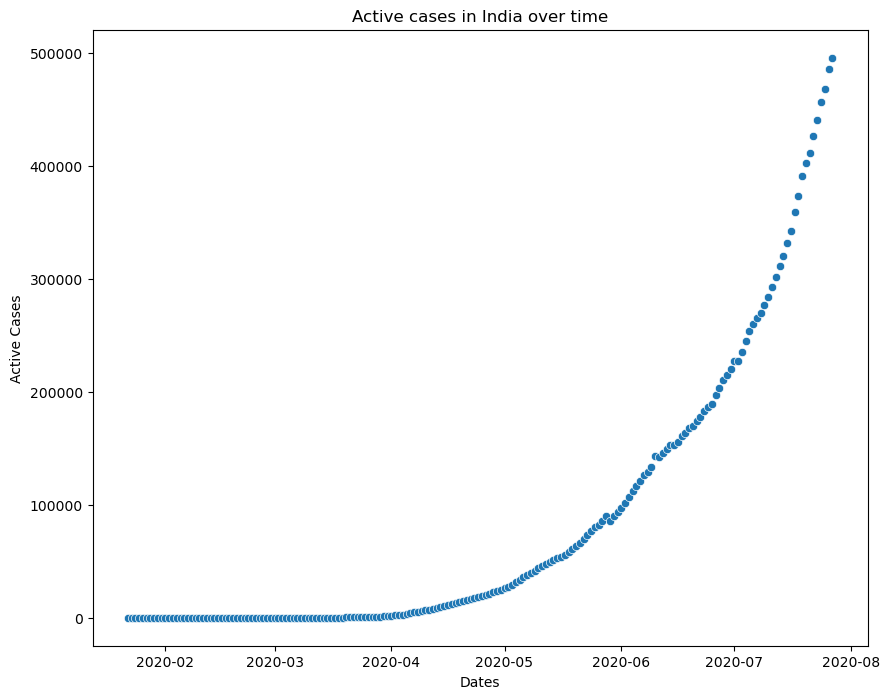

In [41]:
# Visualizing Scatterplot to show the active cases in India over time

plt.figure(figsize=(10,8))
sns.scatterplot(data = active_cases_India, x= 'date',y='active')
plt.xlabel('Dates')
plt.ylabel('Active Cases')
plt.title('Active cases in India over time')
plt.show()

## Use Facebook prophet library to make time series model
### Model Building

In [42]:
pip install prophet

In [44]:
#Importing prophet library
from prophet import Prophet

In [45]:
#creating confirmed dataset to analysze future cases
#Grouping data on date
confirmed_df = covid_df.groupby(['date'])['confirmed'].sum().reset_index()
confirmed_df

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [46]:
#Renaming the columns as prophet requires columns as 'ds' and 'y'
confirmed_df.rename(columns={'date':'ds','confirmed':'y'},inplace=True)
confirmed_df

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [48]:
#Creating Model using Prophet and interval width as 95 percent

model = Prophet(interval_width=0.95)
model.fit(confirmed_df)

23:30:37 - cmdstanpy - INFO - Chain [1] start processing
23:30:37 - cmdstanpy - INFO - Chain [1] done processing


In [49]:
##Generating next 7 days date

future_df = model.make_future_dataframe(periods=7) #periods = days
future_df

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [58]:
#Forecasting the Confirmed cases for next 7 days

forecast = model.predict(future_df)
forecast[['ds','yhat_lower','yhat','yhat_upper']].tail(10)

,ds,yhat_lower,yhat,yhat_upper
185,2020-07-25,1.558626e+07,1.574174e+07,1.590293e+07
186,2020-07-26,1.577527e+07,1.593953e+07,1.610259e+07
187,2020-07-27,1.598144e+07,1.613441e+07,1.630402e+07
188,2020-07-28,1.616420e+07,1.632401e+07,1.648045e+07
189,2020-07-29,1.638673e+07,1.653405e+07,1.670250e+07
190,2020-07-30,1.659936e+07,1.674820e+07,1.691951e+07
191,2020-07-31,1.679524e+07,1.696362e+07,1.713531e+07
192,2020-08-01,1.700813e+07,1.717143e+07,1.734184e+07
193,2020-08-02,1.719415e+07,1.736922e+07,1.754114e+07
194,2020-08-03,1.738309e+07,1.756410e+07,1.774423e+07


## Visualize the prediction by combining these technologies.

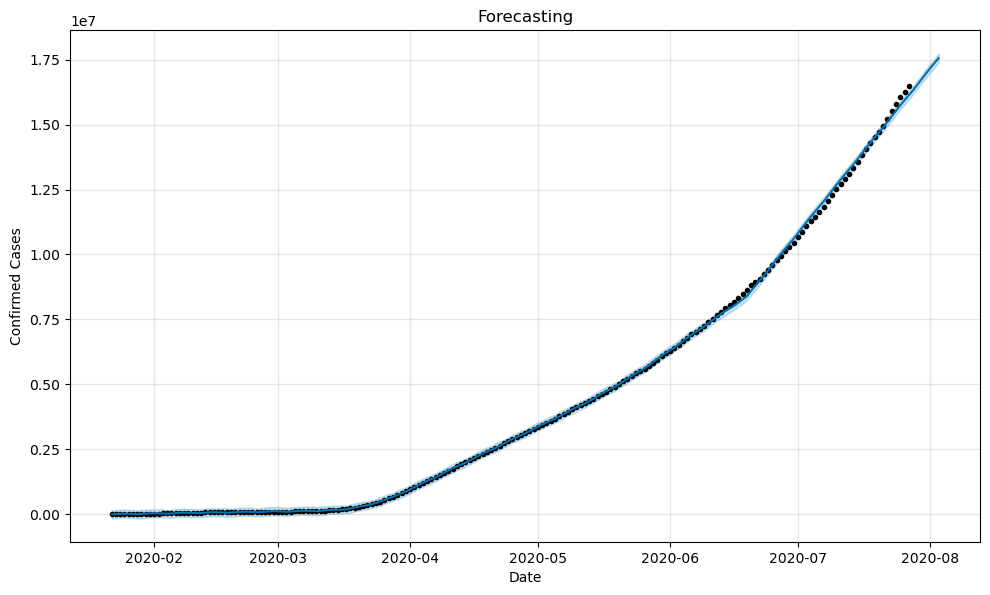

In [60]:
#Plotting Actual and forecasted values for confirmed cases 

confirmed_forecast_plot = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Forecasting')
plt.show()

In [64]:
round(forecast['yhat']).tail(7)

188    16324013.0
189    16534050.0
190    16748198.0
191    16963622.0
192    17171430.0
193    17369219.0
194    17564097.0
Name: yhat, dtype: float64